# **Exploratory Data Analysis on Electric Vehicle in State of Washington**

  interim-budget-2024---electric-vehicles-014756634-16x9_0.avif

## **Objective**
My project intends to create an **exploratory analytics** and **visualization tool** to **support decision-making and sustainable urban development**. This tool will benefit:
- **Policymakers**: Design effective, region-specific policies by analyzing EV density and distribution, identifying areas needing infrastructure or incentives.

- **Urban planners**: Integrate EV-friendly amenities, plan charging station locations, assess EV traffic patterns, and adapt city layouts.

- **The public**: Make informed EV purchase decisions, understand regional trends, and advocate for better infrastructure.

My project can answer these questions:

1. Which counties have the highest number of registered EVs?
2. Which cities have the highest number of registered EVs?
3. What are the market shares of the top 10 EV manufacturers?
4. Which EV models are the most popular among consumers?
5. What types of EVs are most commonly used in Washington State?
6. How is the distribution of eligible EVs across different regions?
7. How have the trends in EV types evolved over the past decade?
8. How has the average electric range of EVs changed over the years?


## **About the dataset**

    Data Source: https://catalog.data.gov/dataset/electric-vehicle-population-data

The dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently regiestered through Washington State Department of Licensing (DOL).

1. A Battery Electric Vehicle (BEV) is an all-electric vehicle using one or more batteries to store the electrical energy that powers the motor and is charged by plugging the vehicle into an electric power source.

2. Alternative Fuel Vehicle (CAFV) Eligibility is based on the fuel requirement and electric-only range requirement as outlined in RCW 82.08.809 and RCW 82.12.809 to be eligible for Alternative Fuel Vehicles retail sales and Washington State use tax exemptions.

3. Monthly count of vehicles for a county may change from this report and prior reports. Processes were implemented to more accurately assign county at the time of registration.

4. Electric Range is no longer maintained for Battery Electric Vehicles (BEV) because new BEVs have an electric range of 30 miles or more. Zero (0) will be entered where the electric range has not been researched.

### **The data**
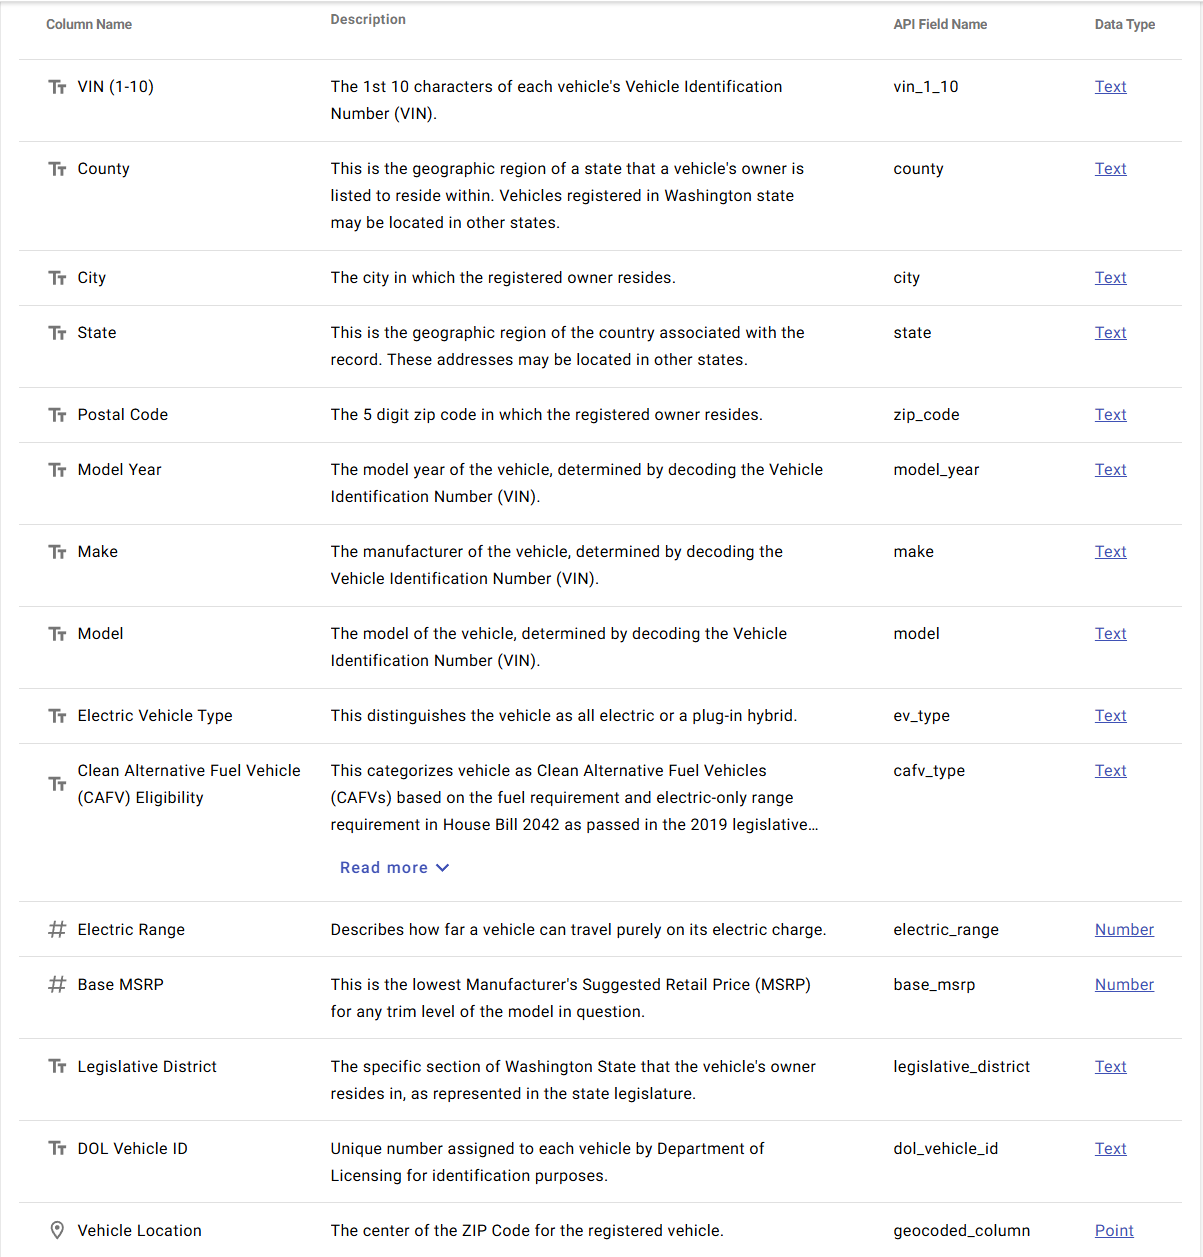

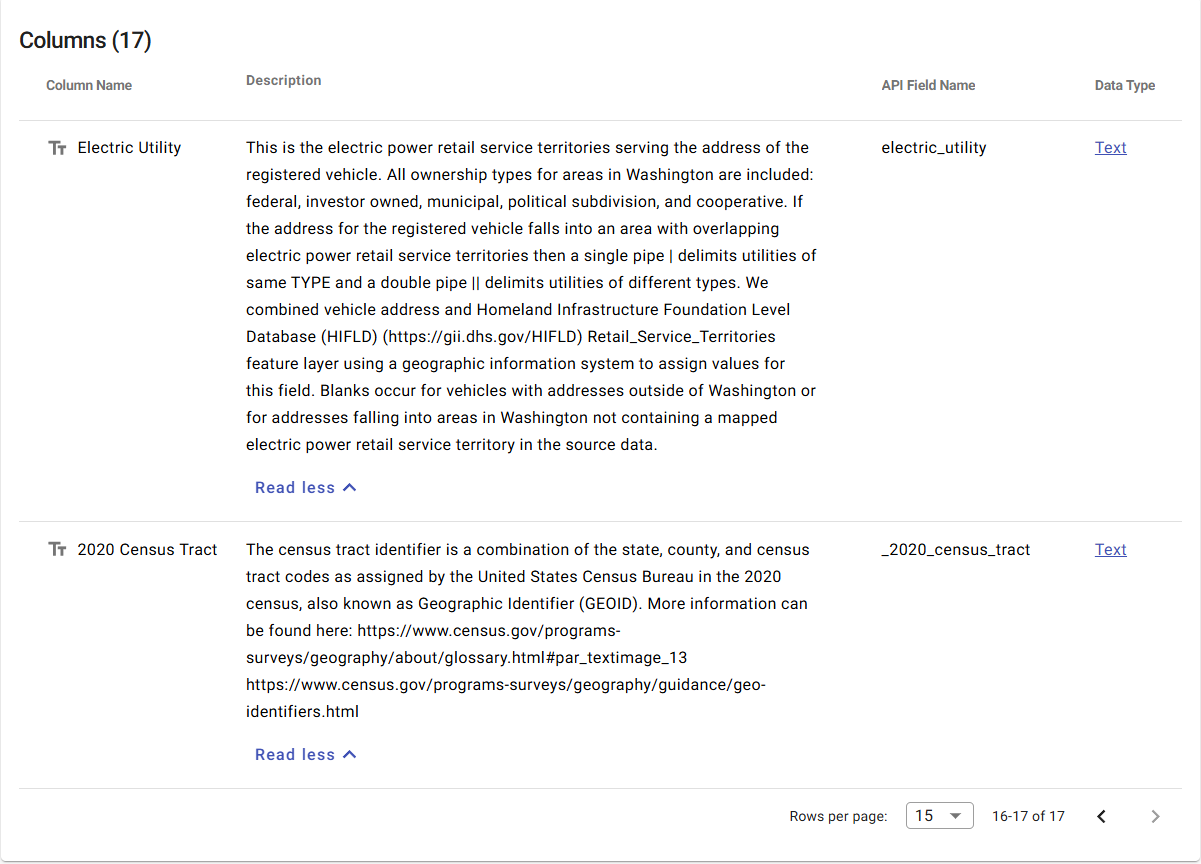

## **I. Data Overview**

### Import dataset

some necessary packages

In [ ]:
%%capture
!pip install plotly-geo
!pip install geopandas==0.8.1
!pip install pyshp==2.1.2
!pip install shapely==1.8.4
!pip install addfips

In [1]:
# @title Install necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-deep')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DA Project/EDA Washington Electric Vehicle Population Data/Electric_Vehicle_Population_Data.csv')

Have a look at our dataset!

In [3]:
# @title dataset overview
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,15.0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10


Some information about dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200048 entries, 0 to 200047
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         200048 non-null  object 
 1   County                                             200044 non-null  object 
 2   City                                               200044 non-null  object 
 3   State                                              200048 non-null  object 
 4   Postal Code                                        200044 non-null  float64
 5   Model Year                                         200048 non-null  int64  
 6   Make                                               200048 non-null  object 
 7   Model                                              200048 non-null  object 
 8   Electric Vehicle Type                              200048 non-null  object

> The dataset include **200048 rows** and **17 columns**. There are **missing data** in **County, City, Postal Code, Legislative District, Vehicle Location, Electric Utility** and **2020 Census Tract**. By the dataset description, **Postal Code**, **DOL Vehicle ID**, **Legislative District** and **2020 Census Tract** are identifier for each car and each location. Therefore, we will take some of them out of numerical statistic.

We will seperate data into **catergorial** and **numerical** variables

In [5]:
# List of categorical variables
categorical = [i for i in df.columns if df[i].dtypes == 'O']
# List of numerical variables
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility'] 
 numerical:  ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']


Let's check some basic statistics of numeric data

In [6]:
# @title Basic Statistics of the numeric data
df[['Model Year','Electric Range','Base MSRP']].describe()

,Model Year,Electric Range,Base MSRP
count,200048.000000,200048.000000,200048.000000
mean,2020.871261,53.485279,947.551913
std,2.994933,88.786301,7860.591091
min,1997.000000,0.000000,0.000000
25%,2019.000000,0.000000,0.000000
50%,2022.000000,0.000000,0.000000
75%,2023.000000,53.000000,0.000000
max,2025.000000,337.000000,845000.000000


> The dataset comprises over **200,048 cars** be registered in Washington State as of **August 2024**, with model years ranging from **1997 to 2025**. The **travel range** of electric vehicles extends up to **337** miles per charge; however, the minimum and median values for this metric are 0. A significant discrepancy is also observed in the **Base MSRP** data. These data points may not be entered or up-to-date properly. A more detailed analysis will be provided in the next section.

Next, check some basic statistics of categorical datas

In [7]:
df[categorical].describe()

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,200048,200044,200044,200048,200048,200048,200048,200048,200040,200044
unique,11978,199,763,45,42,151,2,3,917,74
top,7SAYGDEE6P,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.1207376 47.6705374),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,1219,102837,32602,199606,88083,41986,156956,109401,5064,73386


>

> In a brief overview, the dataset reveals that certain vehicles appear up to **1,219** times. The majority of these vehicles are registered in **Seattle**, **King** County. **Tesla** emerges as the most popular brand, with the **Model Y** being the most prevalent model. Most vehicles are Battery Electric Vehicles (**BEVs**). However, there are still **109,401** vehicles classified as **unknown** for clean alternative fuel status. **Puget Sound Energy Inc**., located in **Tacoma**, serves the highest number of vehicles in **Washington State**

## **II. Data manipulation**

Firstly, I want to check any duplicated data from the dataset

### **1. Checking duplicated data**

In [8]:
df.duplicated().sum()

0

In [9]:
df['VIN (1-10)'].duplicated().sum()

188070

> There are **no duplicated data** in dataset; however, **VIN number** is the each car unique identification number has duplicated as total **188070**. These cars may be re-registered in Washington State when the owner resell their cars.

Let's see how many unique cars are registered and how many data rows for each unique car **VIN number**.

In [10]:
# Count unique car are registered in Washington State
print(r"Number of unique car registered in Washington State is {} cars".format(df['VIN (1-10)'].nunique()))

Number of unique car registered in Washington State is 11978 cars


In [11]:
# Count duplicated VIN number in dataset
unique_vin = df.groupby(['VIN (1-10)'])['County'].count().rename("no_of_appearance").sort_values(ascending=False).reset_index()
unique_vin

,VIN (1-10),no_of_appearance
0,7SAYGDEE6P,1219
1,7SAYGDEE7P,1216
2,7SAYGDEEXP,1181
3,7SAYGDEE8P,1178
4,7SAYGDEE5P,1175
...,...,...
11973,7JRH60FL4R,1
11974,7JRH60FL4N,1
11975,7JRH60FL3R,1
11976,7JRH60FL2P,1


We can see that there are only **11,978** unique cars out of more than 200,000 car registrations. Notably, some cars appear go up to **1,219** times. That is interesting!

We will visualize the **distribution of car’s appearance** in the dataset.

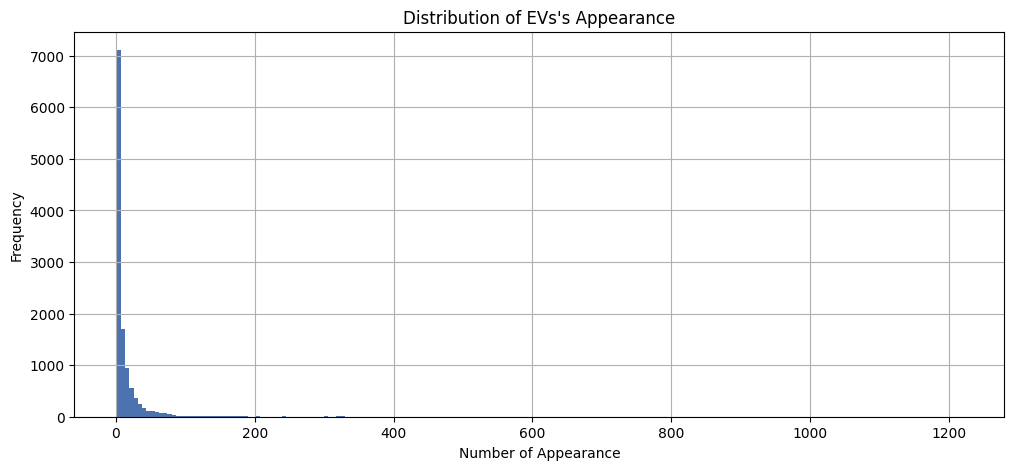

In [12]:
# @title Distribution of EVs's Appearance in the Dataset
unique_vin.no_of_appearance.hist(bins = 200,figsize=(12,5))
plt.xlabel('Number of Appearance')
plt.ylabel('Frequency')
plt.title("Distribution of EVs's Appearance")
plt.show()

More detail with statistic of Unique Registered EV's Appearance

In [13]:
#Descriptive Statistics of Unique Registered EVs’ Appearance
unique_vin.no_of_appearance.describe()

,no_of_appearance
count,11978.000000
mean,16.700952
std,51.240918
min,1.000000
25%,2.000000
50%,5.000000
75%,14.000000
max,1219.000000


> There are **75%** of cars have been re-registered **less than 15 times** in Washington State. This is noteworthy, and we will use one of these instances to examine the differences between the records.

In [ ]:
#unique_vin.query('duplicated_row > 4')
df[df['VIN (1-10)'] == 'WP1AE2AY1L']

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
3764,WP1AE2AY1L,King,Sammamish,WA,98074.0,2020,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,81100,45.0,122397229,POINT (-122.0430602 47.6259676),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
170434,WP1AE2AY1L,King,Carnation,WA,98014.0,2020,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,81100,5.0,122831740,POINT (-121.921987 47.65881),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
187400,WP1AE2AY1L,Franklin,Pasco,WA,99301.0,2020,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,81100,16.0,138927372,POINT (-119.1429639 46.2546529),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,5.302102e+10
188777,WP1AE2AY1L,King,Redmond,WA,98053.0,2020,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,81100,45.0,113140401,POINT (-122.030684 47.669552),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
189973,WP1AE2AY1L,Yakima,Yakima,WA,98903.0,2020,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,81100,14.0,255472465,POINT (-120.5807155 46.5654909),PACIFICORP,5.307700e+10


> It is clear that there are different **`DOL Vehicle IDs`**, which are unique numbers issued by the **Department of Licensing**. This indicates that one car can be **resold** and **re-registered** by new owners.

Secondly, we will check and handle missing data

### **2. Handling the missing data**

In [14]:
df.isna().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


> There are **442** missing data in **Legislative District**, **8** missing data in **Vehicle Location**, **4** missing data in **County, State, Postal Code, Electric Utility,** and **2020 Census Tract**.

Let's check how missing data in appear in the dataset

In [15]:
df[df['Vehicle Location'].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
262,WBAJA9C50K,NaN,NaN,AE,NaN,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,53400,NaN,244582593,NaN,NaN,NaN
130404,KNDJX3AE8H,Pacific,Long Beach,WA,98634.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,19.0,106442773,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
146060,KMHE54L2XH,Pacific,Long Beach,WA,98634.0,2017,HYUNDAI,SONATA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,27,0,19.0,245533578,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
148259,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,NaN,159850029,NaN,NaN,NaN
157612,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,475254825,NaN,NaN,NaN
175161,1G1RB6S53J,NaN,NaN,BC,NaN,2018,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,NaN,477613216,NaN,NaN,NaN
181995,1C4JJXP69P,Pacific,Long Beach,WA,98634.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,19.0,254934886,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
192145,1G1FW6S08N,Pacific,Long Beach,WA,98634.0,2022,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,218102209,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10


> Based on the table above, there are **4** missing values for **`County`**, **`City`**,**`Vehicle Location`**, **`Electric Utility`**, and **`2020 Census Tract`** in the same row of the dataset. This is understandable as these data points are interrelated concerning car location. Additionally, these cars are associated with **British Columbia** (BC) and **Alberta** (AE), **Canada**. Therefore, we can **exclude** data that **does not pertain** to the United States.

In [16]:
# Remove 4 records that does not pertain to the US
df = df[~df['County'].isna()]

We still observed **4 missing data** entries in the **Vehicle Location** field pertain to the City of **Long Beach, WA**. Therefore, we can **impute** these missing values using the **Long Beach** location points from other records in the dataset. First, we will verify that the imputed points match accurately.

In [17]:
df[(df['City'] == 'Long Beach') & (df['State'] == 'WA')].head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
87923,5YJ3E1EB1J,Pacific,Long Beach,WA,98631.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,19.0,474549659,POINT (-124.035084 46.375408),BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
90389,4JGDM4EB7P,Pacific,Long Beach,WA,98631.0,2023,MERCEDES-BENZ,EQS-CLASS SUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,265033443,POINT (-124.035084 46.375408),BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
94575,1G1FY6S09M,Pacific,Long Beach,WA,98631.0,2021,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,148912977,POINT (-124.035084 46.375408),BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10


> We have verified that the **Point Location** for **Long Beach, WA** is **POINT (-124.035084 46.375408)**. This will be used to impute the missing values.

In [18]:
# Create Long Beach,WA location point
LongBeach_WA=df[(df['City'] == 'Long Beach') & (df['State'] == 'WA')][['Vehicle Location']].values[0][0]
# Fill NaN value with Long Beach Location point
df['Vehicle Location'].fillna(LongBeach_WA, inplace=True)

In [19]:
# @title Checking missing data in Legislative District column
df[(df['Legislative District'].isna())]
#df[(df['State'] != 'WA')]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
280,WA1E2AFY7P,Douglas,Castle Rock,CO,80104.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,NaN,240663202,POINT (-104.8367434 39.3603485),NON WASHINGTON STATE ELECTRIC UTILITY,8.035015e+09
282,5YJXCAE40H,Maricopa,Goodyear,AZ,85338.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,NaN,226154610,POINT (-112.4087632 33.4136365),NON WASHINGTON STATE ELECTRIC UTILITY,4.013061e+09
286,5YJSA1E43G,Tooele,Tooele,UT,84074.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,NaN,206808885,POINT (-112.2957843 40.5664923),NON WASHINGTON STATE ELECTRIC UTILITY,4.904513e+10
23865,5YJYGDED0M,San Diego,San Diego,CA,92131.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,187492175,POINT (-117.083459 32.914886),NON WASHINGTON STATE ELECTRIC UTILITY,6.073017e+09
38633,5YJ3E1EA8J,St. Mary's,Lexington Park,MD,20653.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,284296715,POINT (-76.4583767 38.2561309),NON WASHINGTON STATE ELECTRIC UTILITY,2.403788e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197802,5YJ3E1EB2M,San Joaquin,Lodi,CA,95242.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,255375585,POINT (-121.3146115 38.1295939),NON WASHINGTON STATE ELECTRIC UTILITY,6.077004e+09
198464,7SAXCBE62N,Loudoun,Aldie,VA,20105.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,198763512,POINT (-77.5724836 38.9439999),NON WASHINGTON STATE ELECTRIC UTILITY,5.110761e+10
198923,5YJSA1E69M,Maricopa,Phoenix,AZ,85028.0,2021,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,183109174,POINT (-112.008736 33.583784),NON WASHINGTON STATE ELECTRIC UTILITY,4.013105e+09
199192,5YJSA1E22G,Cumberland,Fayetteville,NC,28306.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,NaN,127215700,POINT (-78.9503193 34.9956109),NON WASHINGTON STATE ELECTRIC UTILITY,3.705100e+10


> It appears that the **438** missing data points in the **Legislative District do not originate from Washington State**.

Let’s verify this.

In [20]:
df[(df['Legislative District'].isna()) & (df['State'] == 'WA')]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


> According to the data description, the **`Legislative District`** represents the specific section of Washington State where the vehicle’s owner resides, as indicated in the state legislature. Therefore, upon reviewing the dataset, we found that **438** vehicles **do not belong to Washington State**, resulting in **438** missing entries in the **`Legislative District`** column. This can happen because Vehicles registered in Washington state may be **located in other states.**

Let's compare number of cars located in **Washington State** with those in **other states**

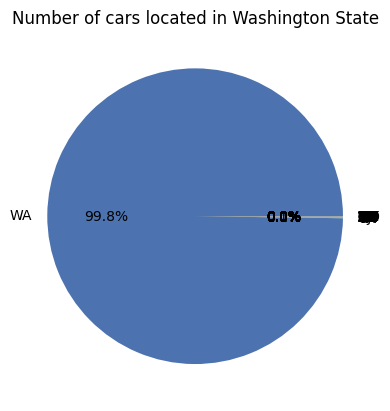

In [21]:
df['State'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')
plt.title('Number of cars located in Washington State')
plt.ylabel('')
plt.show()

> The **number of cars registered in Washington State** is up to **99.8%**. To maintain the accuracy of our analysis and future models, it is essential to exclude vehicles located in the other states. Moreover, they are just only 0.2% of the dataset, so the impact is minor.

Have a look at our data again

In [22]:
df = df[df['State'] == 'WA']
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,15.0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,23.0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10


### **3. Checking Outliers**

In this project, we will use **box plot** and **histogram** to check outliers of the 3 numeric columns **Model Year**, **Electric Range** and **Base Manufacturer Suggested Retail Price (MSRP)**

In [23]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

Let's check the **box plot** to inspect the **range** of the data

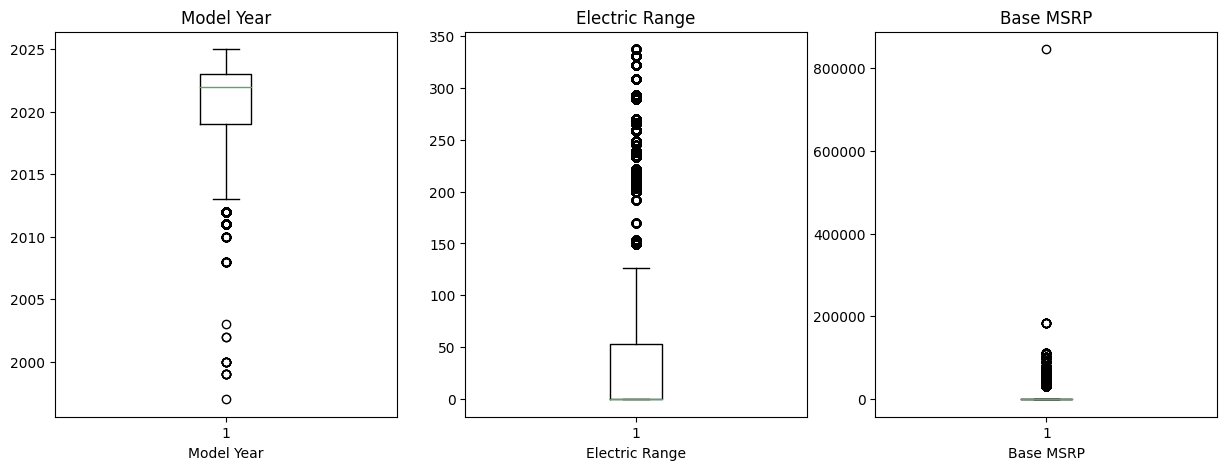

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].boxplot(df[['Model Year']])
axs[0].set_title('Model Year')
axs[0].set_xlabel('Model Year')
axs[1].boxplot(df[['Electric Range']])
axs[1].set_xlabel('Electric Range')
axs[1].set_title('Electric Range')
axs[2].boxplot(df[['Base MSRP']])
axs[2].set_title('Base MSRP')
axs[2].set_xlabel('Base MSRP')
plt.show()

Let's have a look at **histogram** to see the **distribution** of 3 columns

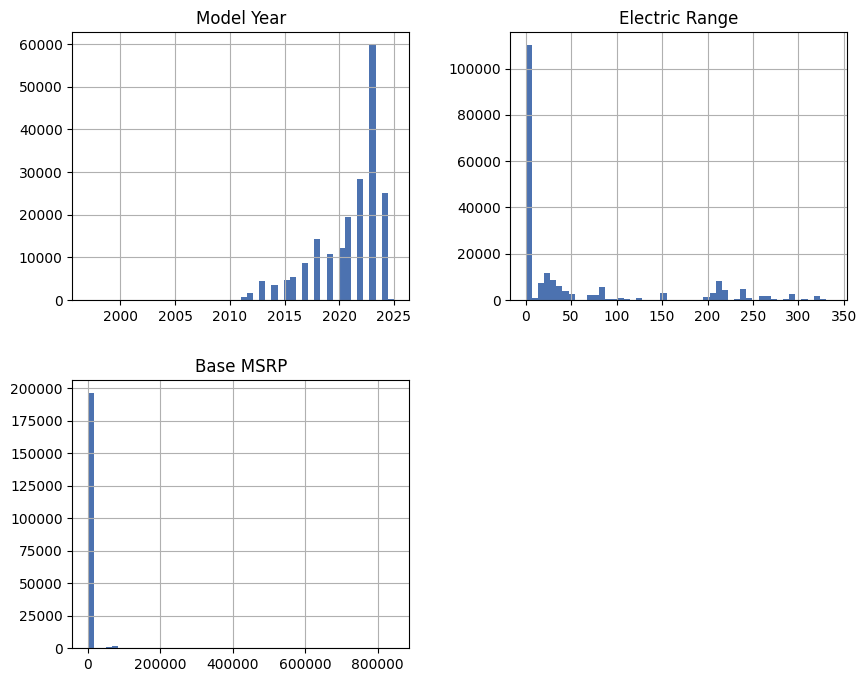

In [25]:
df[['Model Year', 'Electric Range', 'Base MSRP']].hist(bins=50, figsize=(10,8))
plt.show()

let's check the basic **statistics** of these metric

In [26]:
df[['Model Year', 'Electric Range', 'Base MSRP']].describe()

,Model Year,Electric Range,Base MSRP
count,199606.000000,199606.000000,199606.000000
mean,2020.872333,53.464615,946.418845
std,2.995264,88.766469,7855.015721
min,1997.000000,0.000000,0.000000
25%,2019.000000,0.000000,0.000000
50%,2022.000000,0.000000,0.000000
75%,2023.000000,53.000000,0.000000
max,2025.000000,337.000000,845000.000000


> There are few outliers in the **Model Year**, so we will retain it. However, the **electric range** and **base Manufacturer Suggested Retail Price** (MSRP) data are highly skewed, with most values of MSRP being **zero**. Consequently, this column **cannot** be utilized for extracting insights or building a model.

### **4. Clean Data**

We will exclude the **Base MSRP**, and **2020 Census Tract** columns from the dataset

In [27]:
df.drop(['2020 Census Tract', 'Base MSRP'], axis=1, inplace=True)

Get rid of decimal points on **Postal Code**

In [28]:
df['Postal Code'] = df['Postal Code'].astype(int)

Let's have a look at our dataset again. The dataset is now prepared for **exploratory analysis**.

In [29]:
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC
1,1C4JJXP68P,Yakima,Yakima,WA,98901,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,15.0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP
2,WBY8P6C05L,Kitsap,Kingston,WA,98346,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,23.0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC


## **III. Exploratory Data Analysis**

1. Which counties have the highest number of registered EVs?
2. Which cities have the highest number of registered EVs?
3. What are the market shares of the top 10 EV manufacturers?
4. Which EV models are the most popular among consumers?
5. What types of EVs are most commonly used in Washington State?
6. How is the distribution of eligible EVs across different regions?
7. How have the trends in EV types evolved over the past decade?
8. How has the average electric range of EVs changed over the years?

### **Top 10 County for EV Registrations**

We can analyze the **top 10 counties** with the **highest number** of EV registrations in the state to understand the distribution of vehicles across **Washington State**.

In [ ]:
# we need some other package to import map
import plotly.figure_factory as ff
import plotly.express as px
from addfips import AddFIPS

af = AddFIPS()

def zip_to_fips(county):
    try:
        return af.get_county_fips(state='Washington', county=county)
    except ValueError:
        return None

In [ ]:
# Create total of cars in each state
top_10_county = df.groupby(['County'])['DOL Vehicle ID'].count().rename('Total_of_cars').sort_values(ascending=False).reset_index()

# Create columns 'fips' code to create map
top_10_county['fips'] = top_10_county.apply(lambda x: zip_to_fips(x['County']), axis=1)

In [ ]:
# @title Map the distribution of EVs registration accross the Washington State
values = top_10_county['Total_of_cars'].tolist()
fips = top_10_county['fips'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Washington'], show_state_data=True,
    binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Total EVs by County',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)

fig.layout.template = None
fig.show()

We also see the bar chart of top 10 Counties

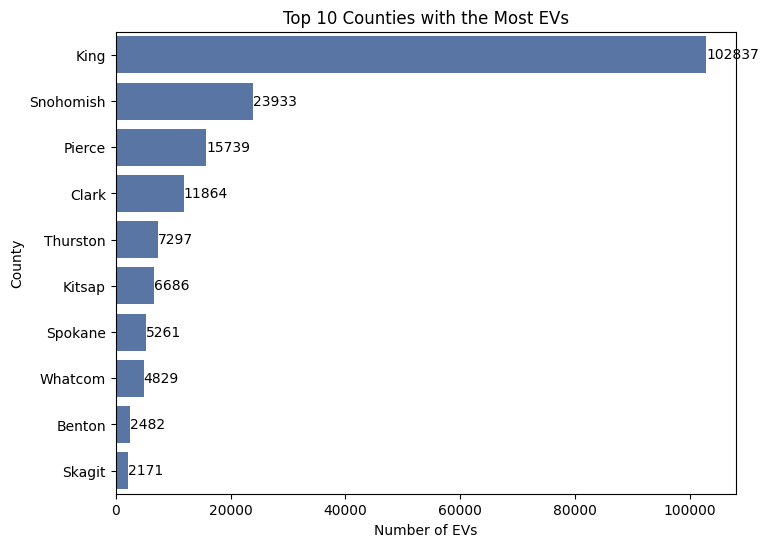

In [ ]:
# Bar chart for top 10 counties
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=top_10_county.Total_of_cars.head(10), y=top_10_county.County.head(10), ax = ax)
ax.bar_label(ax.containers[0])
plt.xlabel('Number of EVs')
plt.ylabel('County')
plt.title('Top 10 Counties with the Most EVs')
plt.show()

In [ ]:
df['County'].value_counts(normalize=True).head(10)

,proportion
County,
King,0.515200
Snohomish,0.119901
Pierce,0.078850
Clark,0.059437
Thurston,0.036557
Kitsap,0.033496
Spokane,0.026357
Whatcom,0.024193
Benton,0.012434


> This data indicates that **over 51% (102,837 cars)** of EVs are registered in **King County**, a figure nearly **5 times higher** than that of the **second-highest (23,933 cars)**, **Snohomish County**. **Pierce**, **Clark**, and **Thurston** counties follow. This demonstrates a **significant concentration** of EV owners within **Washington State**. For future reports, we can incorporate the **population** data for each county in Washington State. This will provide **additional insight**s into the reasons behind the distribution of EVs across the state.

### **Top 10 Cities for EV Registrations**

We can proceed to analyze the **top 10 cities** in **Washington State** with the highest number of EV registrations. This analysis also provides detailed insights into the significant concentration of EVs in Washington State.

In [ ]:
# Count 10 total number of cars regristered by City and County in WA
top_10_city = df.groupby(['City','County'])['DOL Vehicle ID'].count().rename('Total_cars').sort_values(ascending=False).head(10)
top_10_city

,,Total_cars
City,County,
Seattle,King,32602
Bellevue,King,9959
Redmond,King,7165
Vancouver,Clark,7081
Kirkland,King,5883
Renton,King,5835
Sammamish,King,5795
Bothell,Snohomish,5250
Olympia,Thurston,4829


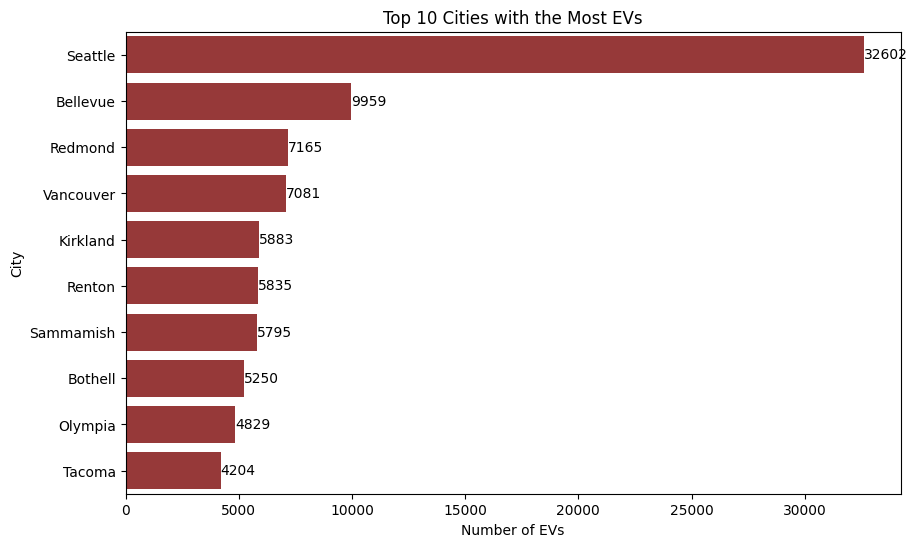

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
top_10_city = top_10_city.reset_index()
sns.barplot(data = top_10_city, x='Total_cars', y='City', ax = ax, color = 'brown')
ax.bar_label(ax.containers[0])
plt.xlabel('Number of EVs')
plt.ylabel('City')
plt.title('Top 10 Cities with the Most EVs')
plt.show()

> **Six cities** in **King County** are among the top 10 cities with the most EVs in Washington State. **Seattle** holds the **first position** with **32,602** cars, which is **more than three times** higher than the second position. **Bellevue** hold the second spot with **9,959** cars.

### **Top 10 Manufacturers with EVs**

This analysis identifies the **top 10 EV manufacturers** in the market. Understanding the leading manufacturers is crucial for several **reasons**: it helps gauge **market trends**, informs **investment decisions**, and provides insights into **technological advancements** and **competitive** dynamics within the EV industry.

In [ ]:
# Create table for top 10 makers
top_maker = df.groupby('Make')['DOL Vehicle ID'].count().rename('Total_cars').sort_values(ascending=False).reset_index()

# Create 1 column to combine non top 10 EV maker as 'Other'
top_maker['top_10'] =  top_maker.apply(lambda x: x['Make'] if x['Total_cars'] in sorted(top_maker['Total_cars'], reverse=True)[:10] else 'Other', axis=1)

# Sort total cars descending order
top_10_maker = top_maker.groupby('top_10')['Total_cars'].sum().sort_values(ascending=False)

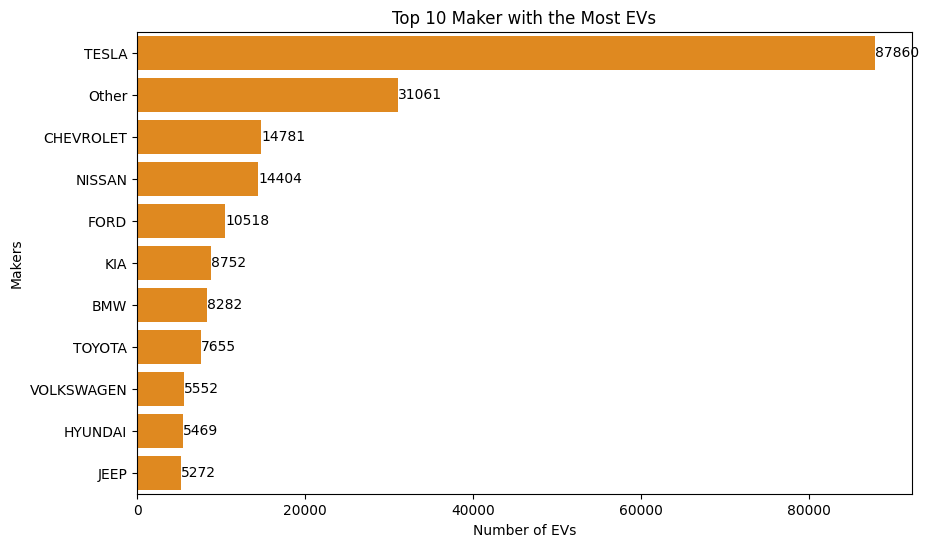

In [ ]:
# Draw bar chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=top_10_maker.values, y=top_10_maker.index, ax = ax, color = 'darkorange')
plt.bar_label(ax.containers[0])
plt.xlabel('Number of EVs')
plt.ylabel('Makers')
plt.title('Top 10 Maker with the Most EVs')
plt.show()

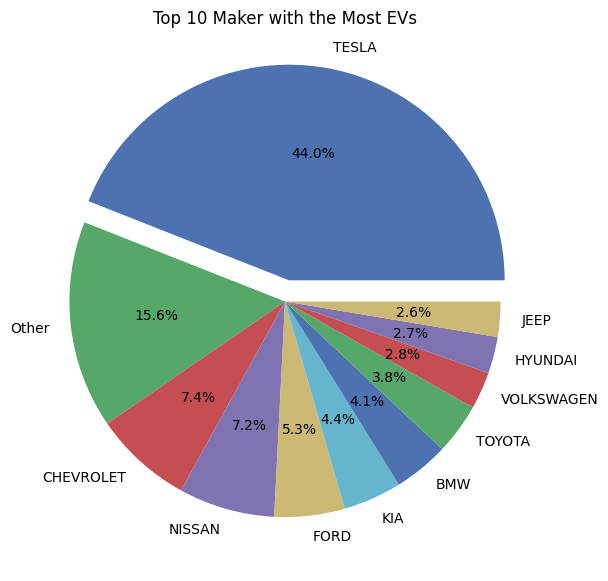

In [ ]:
# Pie Chart
plt.figure(figsize=(7, 7))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0,0)
plt.pie(top_10_maker.values, labels = top_10_maker.index, autopct='%1.1f%%', explode=explode)
plt.title('Top 10 Maker with the Most EVs')
plt.show()

> The charts ranks EV manufacturers by the number of vehicles produced. **Tesla** dominates the market with **87,860 EVs (44%)**, followed by **Chevrolet**, **Nissan**, **Ford**, and other brands.

### **Most purchased Models and EVs type**

In [ ]:
df.groupby(['Model','Make'])['DOL Vehicle ID'].count().rename('Total_cars').sort_values(ascending=False).head(10)

,,Total_cars
Model,Make,
MODEL Y,TESLA,41893
MODEL 3,TESLA,31513
LEAF,NISSAN,13484
MODEL S,TESLA,7847
BOLT EV,CHEVROLET,6636
MODEL X,TESLA,6174
VOLT,CHEVROLET,4819
ID.4,VOLKSWAGEN,4473
MUSTANG MACH-E,FORD,3972


Let's see the pie chart of this analysis

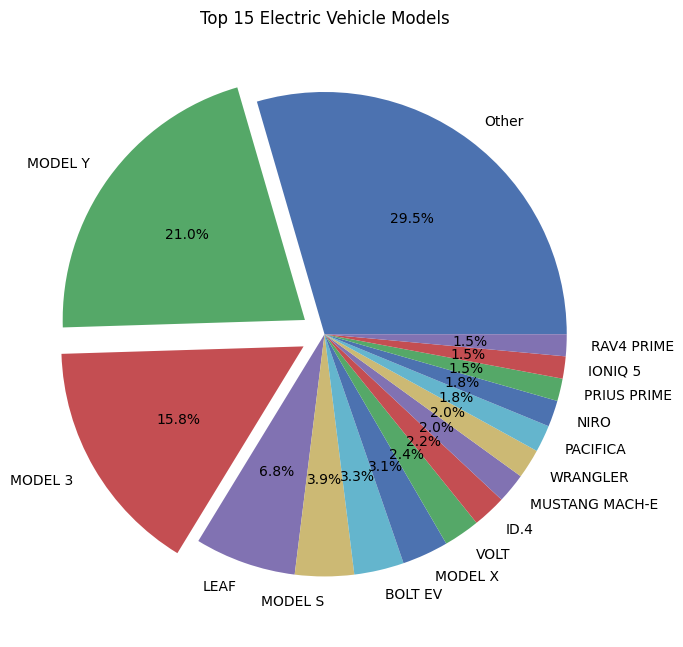

In [ ]:
# Create table for top 15 models
top_model = df.groupby('Model')['DOL Vehicle ID'].count().rename('Total_cars').sort_values(ascending=False).reset_index()

# Create 1 column to combine non top 10 EV model as 'Other'
top_model['top_15'] =  top_model.apply(lambda x: x['Model'] if x['Total_cars'] in sorted(top_model['Total_cars'], reverse=True)[:15] else 'Other', axis=1)

# Sort total cars descending order
top_15_model = top_model.groupby('top_15')['Total_cars'].sum().sort_values(ascending=False)
explode = (0, 0.1, 0.1, 0,0,0,0,0,0,0,0,0,0,0,0,0)

plt.figure(figsize=(7, 7))
plt.pie(top_15_model.values, labels = top_15_model.index,autopct='%1.1f%%', explode = explode)

plt.title('Top 15 Electric Vehicle Models')
plt.tight_layout()
plt.show()

> Tesla’s **Model Y** represents **21%** of EVs, with the **Model 3** following closely. Altogether, **Tesla** holds **nearly 37%** of the EV market with only 2 models in Washington, USA. **Nissan’s Leaf** ranks **third**, capturing approximately **6.8%** of the market share.

### **Distribution of EV Eligibility**

Let's reveal the number of cars eligible for clean vehicle status in Washington State.

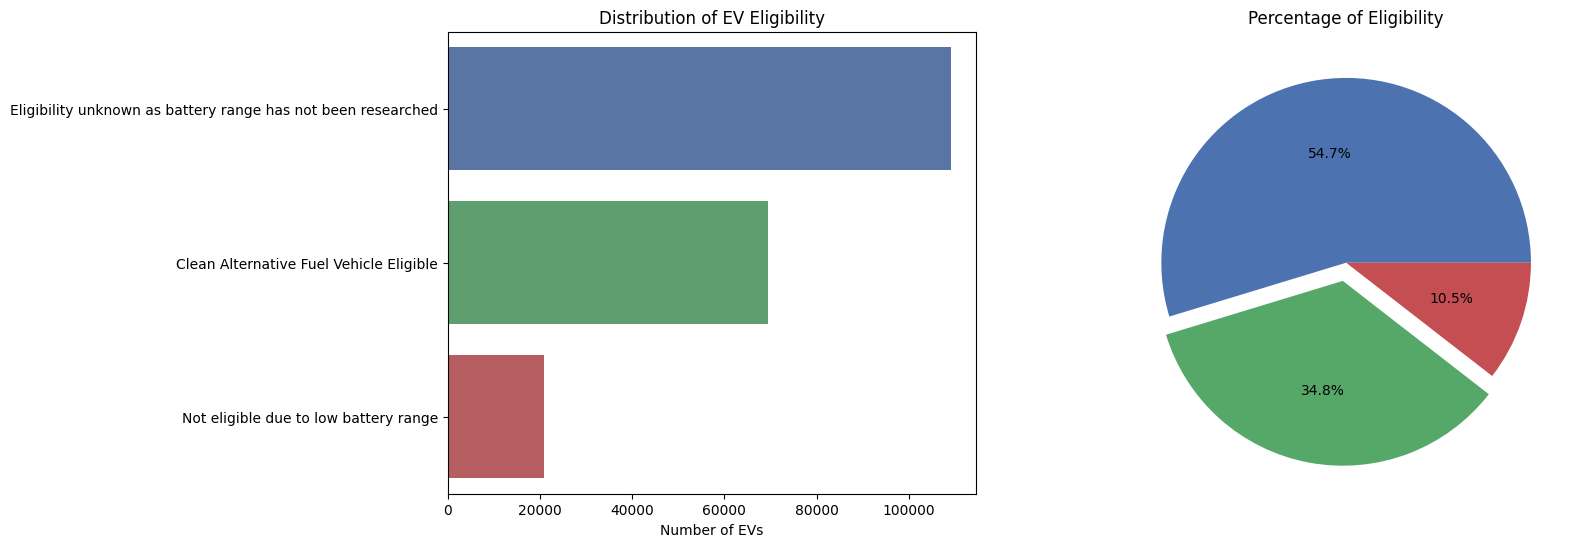

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))
sns.barplot(x = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(),
            y = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().index,
            hue = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().index,
            ax = ax[0])

ax[1].pie(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(), labels = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().index
          ,autopct='%1.1f%%', labeldistance=None, explode = (0, 0.1, 0))
ax[1].set_title('Percentage of Eligibility')
ax[0].set_xlabel('Number of EVs')
ax[0].set_ylabel('')
ax[0].set_title('Distribution of EV Eligibility')

plt.show()

> The chart indicates that nearly **70,000** cars, accounting for **34.8%** of the market, are **eligible** for **clean vehicle** status—more than **three times** the number of **ineligible** cars. However, it also highlights a **limitation** of our dataset, as **54.7%** of the total cars **have not been researched**.

### **Trends in EV Types Over the Years**

Let’s examine the **trends of Electric Vehicles over the years** and **compare** the growth of **Battery Electric Vehicles** (BEVs) and **Hybrid Vehicles**.

In [ ]:
# Create table for number of cars for EV type over the year
ev_type_by_year = df.groupby('Model Year')['Electric Vehicle Type'].value_counts().unstack()
ev_type_by_year.tail(8)

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Model Year,,
2018,10040.0,4375.0
2019,8899.0,2023.0
2020,10267.0,1831.0
2021,15593.0,3953.0
2022,23922.0,4436.0
2023,52223.0,7571.0
2024,17887.0,7270.0
2025,30.0,143.0


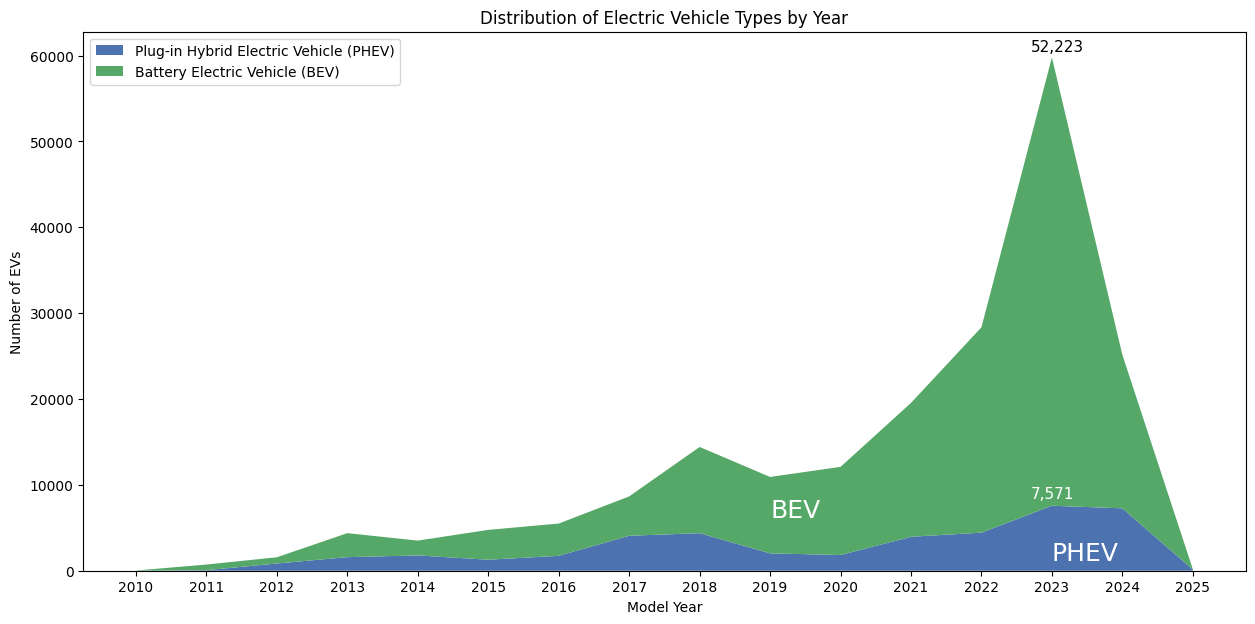

In [ ]:
# @title Trends in EV Over the Years
fig, ax = plt.subplots(figsize=(15, 7))
ax.stackplot(ev_type_by_year.index, ev_type_by_year['Plug-in Hybrid Electric Vehicle (PHEV)'],
             ev_type_by_year['Battery Electric Vehicle (BEV)'],
             labels=['Plug-in Hybrid Electric Vehicle (PHEV)','Battery Electric Vehicle (BEV)'])
ax.legend(loc='upper left')
ax.set_xlabel('Model Year')
ax.set_ylabel('Number of EVs')
ax.set_title('Distribution of Electric Vehicle Types by Year')
ax.xaxis.set_ticks(np.arange(2010, 2026, 1))

def add_region_label(x, y, text, color, path_effects, fontsize, ax):
    ax.text(
        x, y, text, color=color,
        fontsize=fontsize,
        va="center", ha="left", path_effects=path_effects
    )
# Annotate labels for regions ------------------------------
region_labels = [
    {"x": 2019, "y": 7000, "text": "BEV", "color": "white", "path_effects":[], "fontsize": 18},
    {"x": 2023, "y": 2000, "text": "PHEV", "color": "white", "path_effects":[], "fontsize": 18},
    {"x": 2022.7, "y": 61000, "text": "52,223", "color": "black", "path_effects":[], "fontsize": 11},
    {"x": 2022.7, "y": 9000, "text": "7,571", "color": "white", "path_effects":[], "fontsize": 11}
]

for label in region_labels:
    add_region_label(**label, ax=ax)
plt.show()

> Although the dataset lacks registration dates and the model year is not entirely accurate for time series analysis—since a 2020 car model can be purchased in 2024—we can still extract valuable insights from this area chart. It shows that **Battery Electric Vehicles (BEVs)** have **grown significantly faster** than **Plug-in Hybrid Electric Vehicles (PHEVs)**. Specifically, the **trend for EVs** surged from **2020**, with **10,267 BEVs** and **1,831 PHEVs**, **peaking** in **2023** with **52,223 BEVs** and **7,571 PHEVs**. As 2024 is not yet complete, we cannot draw conclusions for 2024 and 2025. Overall, **the trend indicates that Electric Vehicles have become increasingly popular in recent years**.

### **Electric Range Over the Years**

In this analysis, we will explore the **relationship** between **travel range per charge** and **EV model year**. The analysis categorizes travel range into **Long Range**, **Medium Range**, and **Short Range**, and highlights the **top three manufacturers**. This will allow us to determine which manufacturer has the **best average travel range**.

In [ ]:
# Create dataframe
ev_range_year = df[['Model Year', 'Make', 'Electric Range']]
ev_range_year = ev_range_year.groupby(['Model Year', 'Make'])['Electric Range'].mean().to_frame().reset_index()

# Categorize the travel range
def travel_range(x):
  if x['Electric Range'] > 199:
    return 'Long Range'
  elif x['Electric Range'] > 99:
    return 'Medium Range'
  else:
    return 'Short Range'

ev_range_year['Average Range'] = ev_range_year.apply(travel_range, axis=1)

In [ ]:
# Create top 3 manufacturer in the dataset
top_maker['top_3'] =  top_maker.apply(lambda x: x['Make'] if x['Total_cars'] in sorted(top_maker['Total_cars'], reverse=True)[:3] else 'Other', axis=1)

# Merge data frame
ev_range_year = ev_range_year.merge(top_maker, on='Make', how='left')
ev_range_year['top_3'] = ev_range_year['top_3'].replace('Other', '')

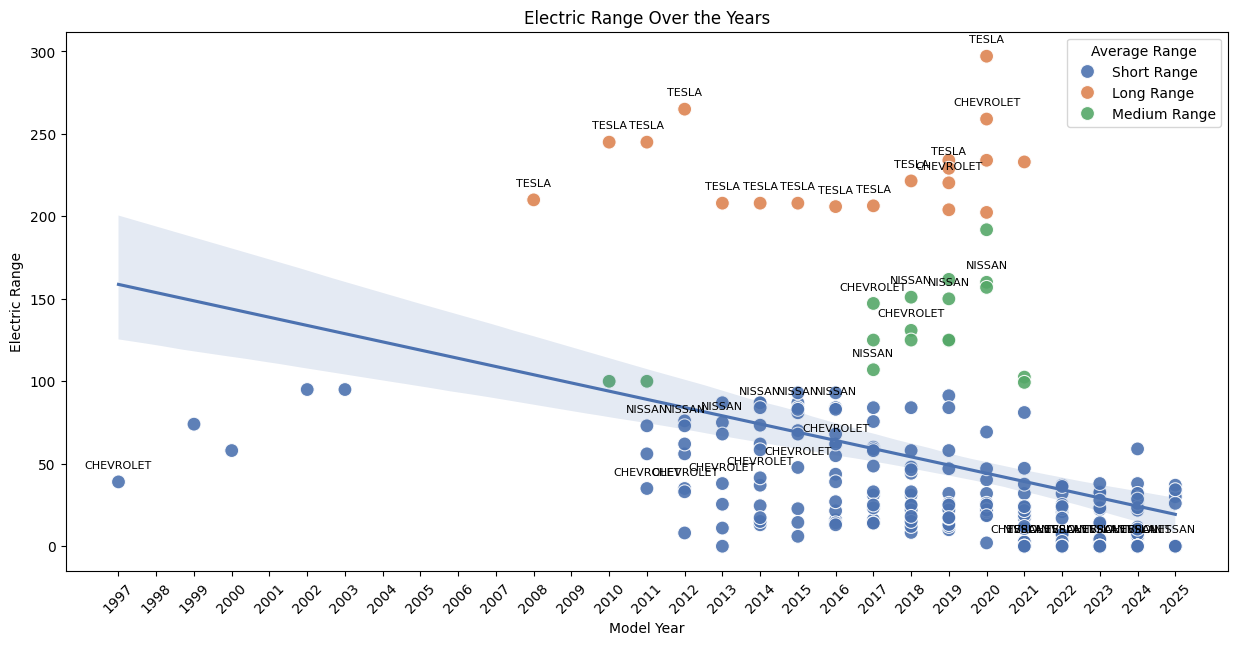

In [ ]:
# Create regplot and scatter plot to explore the relationship
fig, ax = plt.subplots(figsize=(15, 7))
sns.scatterplot(data=ev_range_year, x='Model Year', y='Electric Range', hue = 'Average Range', # size= 'Electric Range', sizes = (40,400),
                s = 100, alpha = 0.9, palette = 'deep', ax = ax)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.xaxis.set_ticks(np.arange(1997, 2026, 1))
plt.xlabel('Model Year')
plt.xticks(rotation=45)
plt.ylabel('Electric Range')
plt.title('Electric Range Over the Years')
#ax.get_legend().remove()

# add annotations one by one with a loop
for line in range(0,ev_range_year.shape[0]):
     plt.text(
          ev_range_year['Model Year'][line],
          ev_range_year['Electric Range'][line] + 10,
          ev_range_year['top_3'][line],
          ha='center',
          va='center',
          fontsize=8,
          color='black'
     )
sns.regplot(data=ev_range_year, x='Model Year', y='Electric Range', scatter = False, ax = ax)
plt.show()

> Although the travel range was expected to improve over the years, the chart indicates that **the average travel range** has actually **decreased**. There is a **weak relationship** between **model year** and **electric range**, as data points often fall beyond the regression line.

> Additionally, **Tesla** has produced the **longest travel range** vehicles, dominating the **Long Range** category. In contrast, **Chevrolet** and **Nissan** focus on manufacturing cars with **medium** and **short ranges**.

## **IV. Findings**

In conclusion, our analysis of the dataset reveals the following insights:

- The counties of **King**, **Snohomish**, **Pierce**, **Clark**, and **Thurston** have the **highest** number of registered **electric vehicles** in Washington State, with **King** County dominating the market with nearly **103,000 vehicles.**
- **Seattle**, along with **five** other cities in **King** County, ranks among the **top 10** cities with the **highest** number of electric vehicles.
- **Tesla** **leads** the market in **Washington State**, accounting for **44%** of all electric vehicle sales.
- **Tesla**'s **Model Y** and **Model 3** are the **most popular models** by a considerable margin.
- **Chevrolet, Nissan, Ford, and Kia** are the **next most popular** manufacturers.
- **Over 34%** of electric vehicles qualify as **clean alternative fuel vehicles**.
- **Battery Electric Vehicles** are being purchased at a **significantly higher** rate compared to **Plug-in Hybrids**.
- Since **2020**, the adoption of electric vehicles has **surged** and continues to **grow rapidly**.
- For most vehicles in the dataset, the **electric range** has remained **stable** or shown a **slight decline** over the years.
- **Tesla** produces vehicles with the **longest travel range** per charge in the market.

# ***Thanks for your attention***